In [4]:
import numpy as np
import iDEA as idea
x = np.linspace(-10,10,150)

v_int = idea.interactions.softened_interaction(x)

v_ext = -2*np.exp(-((x)**2)/10)

system = idea.system.System(x,v_ext,v_int,electrons='uu')
state_ground = idea.methods.interacting.solve(system,k=0)
state_first = idea.methods.interacting.solve(system,k=1)

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...


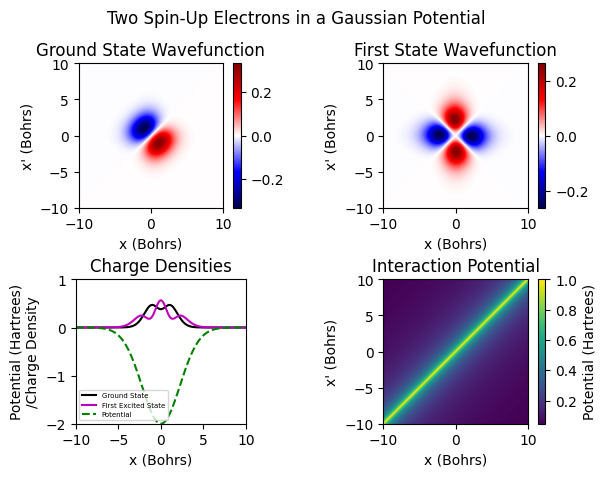

In [92]:
import matplotlib.pyplot as plt

def yaxes_rerange(row_count, new_y_range):
    scale = (new_y_range[1] - new_y_range[0]) / row_count
    y_range = np.array([1, row_count - 1]) * scale

    dy = (y_range[1] - y_range[0]) / 2 - (new_y_range[1] - new_y_range[0])
    ext_y_range = y_range + new_y_range[0] + np.array([-dy, dy])
    extent = [-10, 10, 10, -10]

    aspect = 1

    return extent, aspect

row_count = state_ground.space.real.shape[0]
new_range = [-10,10]

plt.rcParams.update({"figure.autolayout": True})

fig = plt.figure()

ax=fig.add_subplot(2,2,3)
ax.plot(system.x, idea.observables.density(system,state=state_ground), 'k-', label='Ground State')
ax.plot(system.x, idea.observables.density(system,state=state_first), 'm-', label='First Excited State')
ax.plot(system.x, v_ext, 'g--',label='Potential')
ax.legend(prop={'size': 5})
plt.xlim(-10,10)
plt.ylim(-2,1)
ax.set_box_aspect(0.85)
plt.xlabel("x (Bohrs)")
plt.ylabel("Potential (Hartrees)\n/Charge Density")
plt.title("Charge Densities")
pos=ax.get_position()
pos.x0=1.1
ax.set_position(pos)



ax = fig.add_subplot(2,2,1)
extent, aspect = yaxes_rerange(row_count, new_range)
im = ax.imshow(state_ground.space.real, cmap="seismic", vmax = np.max(state_ground.space.real), vmin = -np.max(state_ground.space.real), extent=extent, aspect=aspect)
fig.colorbar(im)
plt.title("Ground State Wavefunction")
plt.xlabel("x (Bohrs)")
plt.ylabel("x' (Bohrs)")
plt.gca().invert_yaxis()



ax = fig.add_subplot(2,2,2)
extent, aspect = yaxes_rerange(row_count, new_range)
im = ax.imshow(state_first.space.real, cmap="seismic", vmax = np.max(state_first.space.real), vmin = -np.max(state_first.space.real), extent=extent, aspect=aspect)
fig.colorbar(im)
plt.title("First State Wavefunction")
plt.xlabel("x (Bohrs)")
plt.ylabel("x' (Bohrs)")
plt.gca().invert_yaxis()


ax = fig.add_subplot(2,2,4)
extent, aspect = yaxes_rerange(row_count, new_range)
im = ax.imshow(system.v_int, vmax = np.max(system.v_int), vmin = np.min(system.v_int), extent=extent, aspect=aspect)
fig.colorbar(im,label="Potential (Hartrees)")
plt.title("Interaction Potential")
plt.xlabel("x (Bohrs)")
plt.ylabel("x' (Bohrs)")
plt.gca().invert_yaxis()
plt.suptitle("Two Spin-Up Electrons in a Gaussian Potential")

plt.show()

